# Graph eigenvectors

In [6]:
import sys

import networkx as nx
import igraph as ig
from networkx.generators.community import LFR_benchmark_graph

import numpy as np
import time
from scipy.linalg import expm, eig

import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 3

#sys.path.append("/home/oriol/Documents/Trento/JacobianGeometry/Code/Dynamics_v2/")
sys.path.append("/Users/giacomobarzon/Desktop/Network_geometry/Code_8thJune/Dynamics_v2/")
#sys.path.append("/home/barzon/Network_geometry/Code_8thJune/Dynamics_v2/")

import utils.CommonFunctions as cf
import utils.plotter as plotter

import importlib
importlib.reload(cf)
importlib.reload(plotter)



<module 'utils.plotter' from '/Users/giacomobarzon/Desktop/Network_geometry/utils/plotter.py'>

In [3]:
N = 60
mean_deg = 8

num_groups = 4; nodes_per_group = N//num_groups; kave = mean_deg; k_out = .15#kave is local average
k_in = kave - k_out
p_in = k_in/nodes_per_group
p_out = k_out/(nodes_per_group*num_groups - nodes_per_group)
print('Block model probs: in %f - out %f' % (p_in, p_out))

G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

while nx.is_connected(G_gn) == 0:
    print('The network should be in a single component. New trial!')
    G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

infoG_gn = ['GN',k_out]

print('Mean degree', np.mean(list(dict(G_gn.degree()).values())))

Block model probs: in 0.523333 - out 0.003333
The network should be in a single component. New trial!
The network should be in a single component. New trial!
Mean degree 7.233333333333333


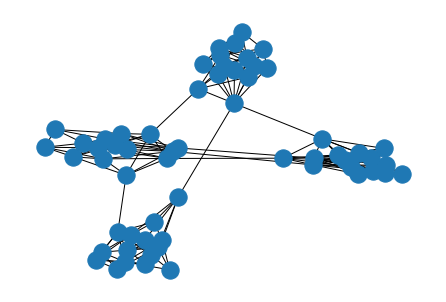

In [21]:
nx.draw(G_gn)

In [13]:
A = nx.to_numpy_array(G_gn)
L = np.eye(N) - A / np.sum(A,axis=0)[:,None]

In [69]:
eigvals, eigvecs = eig(-L) # eigenvectors = columns

# Sort
idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]

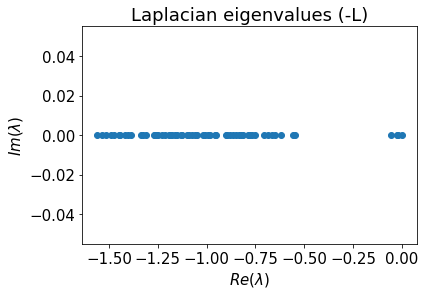

In [70]:
plt.scatter(eigvals.real, eigvals.imag)

plt.xlabel(r'$Re(\lambda)$')
plt.ylabel(r'$Im(\lambda)$')
plt.title('Laplacian eigenvalues (-L)')
#plt.grid()

plt.show()

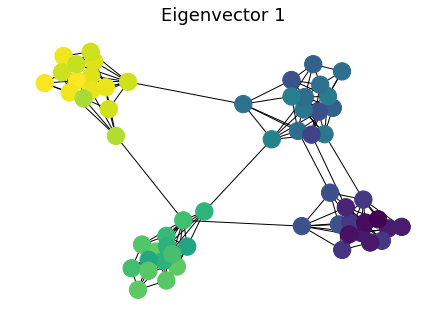

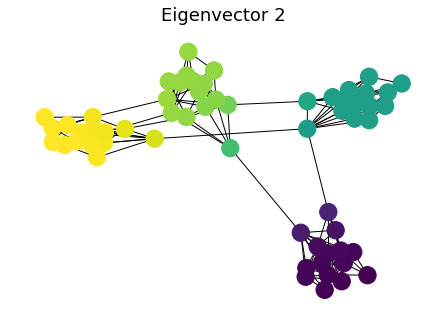

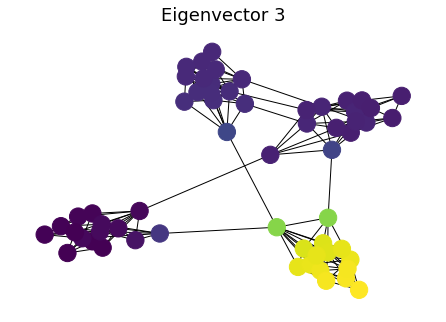

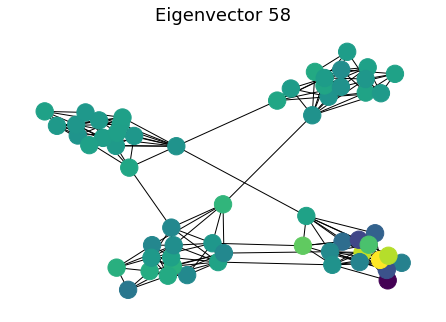

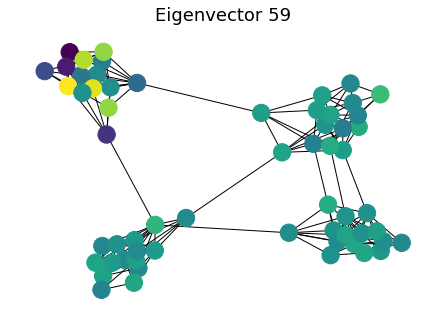

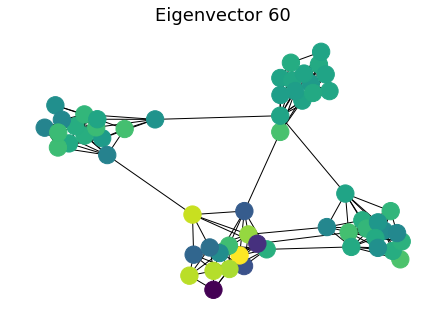

In [85]:
tt = [0, 1, 2, N-3, N-2, N-1]

for t in tt:
    plt.figure()
    nx.draw(G_gn, node_color=eigvecs[:,t])
    plt.title('Eigenvector '+str(t+1))
    plt.show()